In [1]:
import numpy as np
import pandas as pd
from openbb import obb
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.regression.rolling as RollingOLS
import statsmodels.api as sm
from statsmodels import regression
import warnings
warnings.filterwarnings('ignore')
obb.user.preferences.output_type = "dataframe"

In [2]:
sns.set_style('whitegrid')
idx = pd.IndexSlice

In [6]:
symbols = ["TSLA", "AMZN", "NVDA", "GOOG", "AAPL", "META", "MSFT"]

START = "2022-03-14"
END = "2025-03-14"

prices = obb.equity.price.historical(
    symbol=symbols,
    start_date=START,
    end_date=END,
    provider="yfinance").pivot(columns="symbol", values="close")

display(prices.head())

symbol,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
date,,,,,,,
2022-03-14,150.619995,141.852997,126.740997,186.630005,276.440002,21.330000,255.456665
2022-03-15,155.089996,147.366501,129.660507,192.029999,287.149994,22.973000,267.296661
2022-03-16,159.589996,153.104004,133.690506,203.630005,294.390015,24.496000,280.076660
2022-03-17,160.619995,157.238998,134.600494,207.839996,295.220001,24.766001,290.533325
2022-03-18,163.979996,161.250504,136.801498,216.490005,300.429993,26.452999,301.796661


In [7]:
display(prices.describe())

symbol,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
count,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000
mean,182.542056,148.590904,136.788501,342.914775,341.731300,61.163566,239.896760
std,32.114783,40.119126,30.847576,172.705750,72.100726,45.232932,66.374446
min,125.019997,81.820000,83.489998,88.910004,214.250000,11.227000,108.099998
25%,156.620007,115.025002,110.884125,184.917496,271.945000,19.594499,190.087498
50%,177.189995,142.090004,133.665253,305.139999,334.794998,44.937500,233.068336
75%,207.209995,181.602505,164.527500,499.344994,414.094986,107.254997,266.634995
max,259.019989,242.059998,207.710007,736.669983,467.559998,149.429993,479.859985


In [9]:
prices.set_index(pd.DatetimeIndex(prices.index), inplace=True)
monthly_prices = prices.resample('M').last()
display(monthly_prices)

symbol,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
date,,,,,,,
2022-03-31,174.610001,162.997498,139.649506,222.360001,308.309998,27.285999,359.200012
2022-04-30,157.649994,124.281502,114.966499,200.470001,277.519989,18.547001,290.253326
2022-05-31,148.839996,120.209503,114.039001,193.639999,271.869995,18.672001,252.753326
2022-06-30,136.720001,106.209999,109.372498,161.250000,256.829987,15.159000,224.473328
2022-07-31,162.509995,134.949997,116.639999,159.100006,280.739990,18.163000,297.149994
2022-08-31,157.220001,126.769997,109.150002,162.929993,261.470001,15.094000,275.609985
2022-09-30,138.199997,113.000000,96.150002,135.679993,232.899994,12.139000,265.250000
2022-10-31,153.339996,102.440002,94.660004,93.160004,232.130005,13.497000,227.539993
2022-11-30,148.029999,96.540001,101.449997,118.099998,255.139999,16.923000,194.699997


In [23]:
outlier_cutoff = 0.01
data = pd.DataFrame()
lags = [1,2,3,6,9,12]
for lag in lags:
    data[f'return_{lag}m'] = (
        monthly_prices
        .pct_change(lag)
        .stack()
        .pipe(
            lambda x: x.clip(lower=x.quantile(outlier_cutoff), upper=x.quantile(1-outlier_cutoff))
        )
        .add(1)
        .pow(1/lag)
        .sub(1)
    )

data = data.swaplevel().dropna()
display(data)
display(data.info())

,,return_1m,return_2m,return_3m,return_6m,return_9m,return_12m
symbol,date,,,,,,
AAPL,2023-03-31,0.118649,0.069036,0.082689,0.029877,0.021041,-0.004757
AMZN,2023-03-31,0.096148,0.000775,0.071338,-0.014863,-0.003093,-0.037303
GOOG,2023-03-31,0.151716,0.020467,0.054357,0.013166,-0.005581,-0.024263
META,2023-03-31,0.211501,0.192771,0.201711,0.077167,0.030838,-0.003992
MSFT,2023-03-31,0.155882,0.078606,0.063293,0.036205,0.012926,-0.005576
...,...,...,...,...,...,...,...
GOOG,2025-03-31,-0.026710,-0.097076,-0.041654,0.000428,-0.009959,0.008041
META,2025-03-31,-0.090691,-0.061050,0.012421,0.009984,0.020939,0.018857
MSFT,2025-03-31,-0.021235,-0.032450,-0.026760,-0.016862,-0.015435,-0.006605


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 175 entries, ('AAPL', Timestamp('2023-03-31 00:00:00')) to ('TSLA', Timestamp('2025-03-31 00:00:00'))
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   return_1m   175 non-null    float64
 1   return_2m   175 non-null    float64
 2   return_3m   175 non-null    float64
 3   return_6m   175 non-null    float64
 4   return_9m   175 non-null    float64
 5   return_12m  175 non-null    float64
dtypes: float64(6)
memory usage: 10.3+ KB


None

In [25]:
for lag in [2,3,6,9,12]:
    data[f'momentum_{lag}'] = data[f'return_{lag}m'].sub(data.return_1m)

data[f'momentum_3_12'] = data[f'return_12m'].sub(data.return_3m)

display(data)
display(data.describe())

,,return_1m,return_2m,return_3m,return_6m,return_9m,return_12m,momentum_2,momentum_3,momentum_6,momentum_9,momentum_12,momentum_3_12
symbol,date,,,,,,,,,,,,
AAPL,2023-03-31,0.118649,0.069036,0.082689,0.029877,0.021041,-0.004757,-0.049613,-0.035960,-0.088771,-0.097608,-0.123405,-0.087446
AMZN,2023-03-31,0.096148,0.000775,0.071338,-0.014863,-0.003093,-0.037303,-0.095372,-0.024810,-0.111011,-0.099240,-0.133450,-0.108640
GOOG,2023-03-31,0.151716,0.020467,0.054357,0.013166,-0.005581,-0.024263,-0.131249,-0.097360,-0.138550,-0.157297,-0.175979,-0.078620
META,2023-03-31,0.211501,0.192771,0.201711,0.077167,0.030838,-0.003992,-0.018730,-0.009790,-0.134335,-0.180663,-0.215493,-0.205702
MSFT,2023-03-31,0.155882,0.078606,0.063293,0.036205,0.012926,-0.005576,-0.077275,-0.092588,-0.119676,-0.142956,-0.161458,-0.068870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
GOOG,2025-03-31,-0.026710,-0.097076,-0.041654,0.000428,-0.009959,0.008041,-0.070366,-0.014943,0.027138,0.016751,0.034751,0.049695
META,2025-03-31,-0.090691,-0.061050,0.012421,0.009984,0.020939,0.018857,0.029642,0.103112,0.100676,0.111630,0.109548,0.006436
MSFT,2025-03-31,-0.021235,-0.032450,-0.026760,-0.016862,-0.015435,-0.006605,-0.011215,-0.005525,0.004373,0.005800,0.014630,0.020155


,return_1m,return_2m,return_3m,return_6m,return_9m,return_12m,momentum_2,momentum_3,momentum_6,momentum_9,momentum_12,momentum_3_12
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,0.035198,0.035872,0.039278,0.038726,0.035105,0.030937,0.000674,0.004080,0.003528,-0.000093,-0.004261,-0.008341
std,0.100067,0.075061,0.061810,0.044807,0.036672,0.032123,0.067249,0.079814,0.090217,0.098003,0.099316,0.062437
min,-0.275877,-0.199962,-0.147753,-0.057639,-0.063711,-0.039170,-0.249674,-0.244022,-0.233380,-0.288483,-0.319172,-0.228945
25%,-0.028508,-0.013868,-0.000961,0.009918,0.016359,0.010066,-0.037862,-0.040863,-0.047983,-0.047849,-0.048861,-0.039292
50%,0.031548,0.033140,0.033094,0.032502,0.028572,0.025106,0.006432,0.004504,0.004298,0.002708,0.002713,-0.002176
75%,0.093772,0.078598,0.066215,0.052887,0.047928,0.045336,0.039069,0.046268,0.063398,0.065760,0.056449,0.029524
max,0.349887,0.263167,0.201711,0.163293,0.146476,0.107189,0.129498,0.223243,0.329537,0.332755,0.307400,0.177529


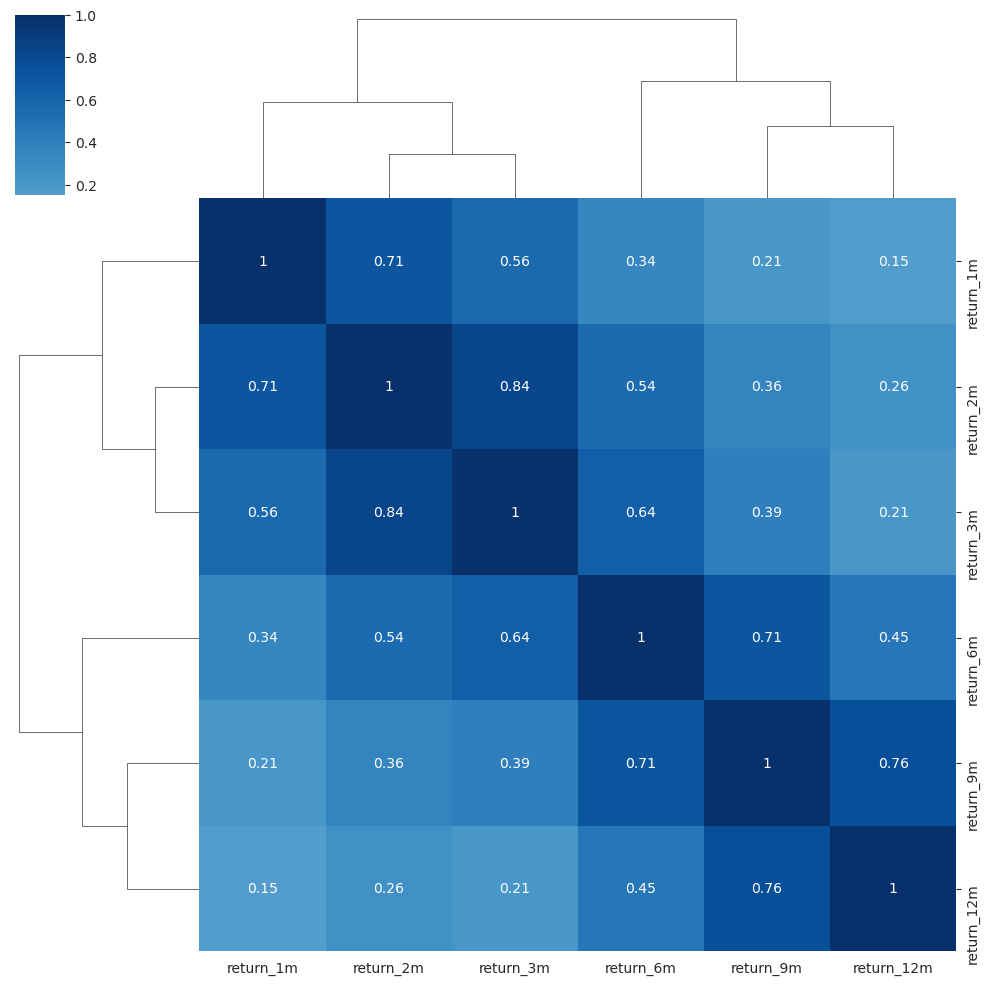

In [27]:
sns.clustermap(data.filter(regex="^return_", axis=1).corr('spearman'), annot=True, center=0, cmap='Blues')

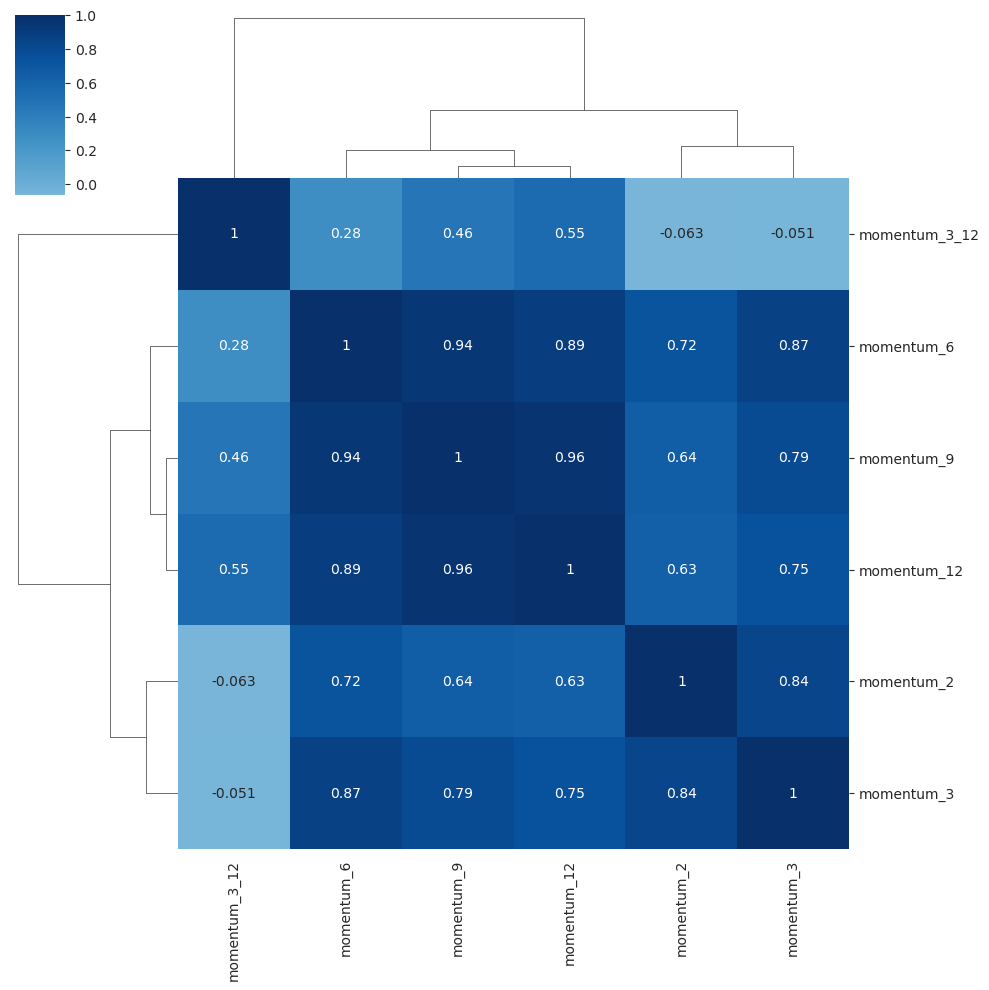

In [28]:
sns.clustermap(data.filter(regex="^momentum_", axis=1).corr('spearman'), annot=True, center=0, cmap='Blues')